In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(
    "C:/Users/Harikrishnan/Desktop/b/Health_Monitoring_App/data/dataset.xlsx",
    skiprows=2,
)

In [3]:
df.head()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Diabetic/NonDiabetic (D/N)
0,9,79,73,118,98,98.300707,99,0,0,N
1,9,80,73,119,102,98.300707,94,1,0,N
2,9,70,76,110,81,98.300707,98,1,0,N
3,9,70,78,115,96,98.300707,96,1,0,N
4,66,100,96,144,92,97.807052,98,0,0,N


In [9]:
df.columns.to_list()

['Age',
 'Blood Glucose Level(BGL)',
 'Diastolic Blood Pressure',
 'Systolic Blood Pressure',
 'Heart Rate',
 'Body Temperature',
 'SPO2',
 'Sweating  (Y/N)',
 'Shivering (Y/N)',
 'Diabetic/NonDiabetic (D/N)']

In [ ]:
df[["Sweating  (Y/N)", "Shivering (Y/N)"]]

,Sweating (Y/N),Shivering (Y/N)
0,0,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
16964,0,0
16965,0,0
16966,0,0
16967,0,0


In [ ]:
df = df.drop(columns=["Sweating  (Y/N)", "Shivering (Y/N)"])

In [15]:
df = df.drop(columns=["Diabetic/NonDiabetic (D/N)"])
df.head()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2
0,9,79,73,118,98,98.300707,99
1,9,80,73,119,102,98.300707,94
2,9,70,76,110,81,98.300707,98
3,9,70,78,115,96,98.300707,96
4,66,100,96,144,92,97.807052,98


# Model Dev

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scaler = StandardScaler()

clustering_algo = {
    "kmeans": KMeans(n_clusters=2, init="k-means++", random_state=42),
    "dbscan": DBSCAN(eps=0.5, min_samples=5),
    "agglomerative": AgglomerativeClustering(n_clusters=2),
}

In [ ]:
df_scaled = scaler.fit_transform(df)

In [24]:
df_scaled.shape

(16969, 7)

In [ ]:
model = KMeans(n_clusters=2, init="k-means++", random_state=42)

In [26]:
model.fit(df_scaled)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [28]:
len(set(model.labels_))

2

In [29]:
set(model.labels_)

{np.int32(0), np.int32(1)}

In [ ]:
labels = model.labels_

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled, labels)
print(score)

0.20750155548465218


In [ ]:
scores = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    scores.append((score, k))

In [34]:
scores

[(0.20750155548465218, 2),
 (0.18271906047104114, 3),
 (0.15615038333579365, 4),
 (0.15218262421985873, 5),
 (0.17700290380381412, 6),
 (0.1733429840364886, 7),
 (0.1639623620932774, 8),
 (0.17010593530839663, 9)]

# Db scan

In [ ]:
eps = np.arange(0.1, 1.6, 0.1)
min_sample = range(2, 10)

In [ ]:
db_scores = []

for ep in eps:
    for samp in min_sample:
        db_model = DBSCAN(eps=ep, min_samples=samp)

        db_label = db_model.fit_predict(df_scaled)
        n_clusters = len(set(db_label)) - (1 if -1 in db_label else 0)

        if n_clusters > 1:
            db_score = silhouette_score(df_scaled, db_label)
        else:
            db_score = -1

        db_scores.append((ep, samp, n_clusters, db_score))

In [43]:
results_df = pd.DataFrame(
    db_scores, columns=["eps", "min_samples", "n_clusters", "silhouette_score"]
)
results_df = results_df.sort_values(by="silhouette_score", ascending=False)

In [44]:
results_df

,eps,min_samples,n_clusters,silhouette_score
105,1.4,3,2,0.303147
115,1.5,5,2,0.296560
114,1.5,4,2,0.296560
113,1.5,3,2,0.296560
116,1.5,6,2,0.296484
...,...,...,...,...
9,0.2,3,128,-0.491553
18,0.3,4,175,-0.500968
17,0.3,3,441,-0.506404
0,0.1,2,227,-0.513409


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

In [ ]:
df_pca = pca.fit_transform(df_scaled)

In [64]:
df_pca.shape

(16969, 4)

In [ ]:
db_model = DBSCAN(eps=1.4, min_samples=2)

db_label = db_model.fit_predict(df_pca)

In [66]:
set(db_label)

{np.int64(0)}

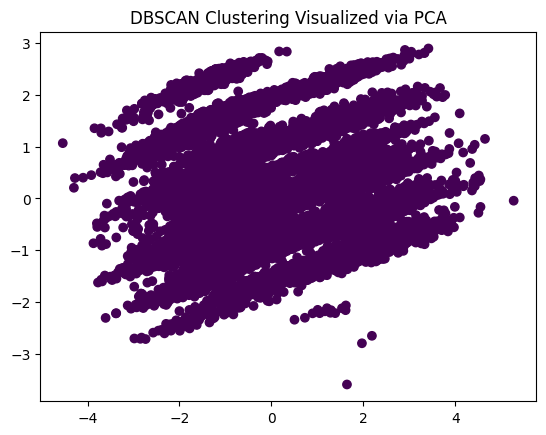

In [ ]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=db_label)
plt.title("DBSCAN Clustering Visualized via PCA")
plt.show()

In [68]:
db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(df_scaled)

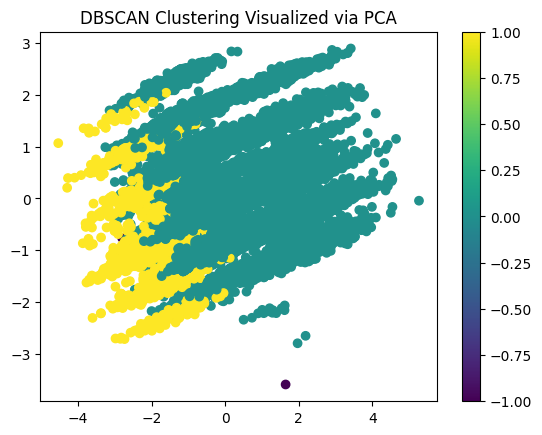

In [69]:
X_pca = PCA(n_components=2).fit_transform(df_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis")
plt.title("DBSCAN Clustering Visualized via PCA")
plt.colorbar()
plt.show()

In [70]:
score = silhouette_score(df_scaled, labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.2966


KMeans Silhouette Score: 0.2075


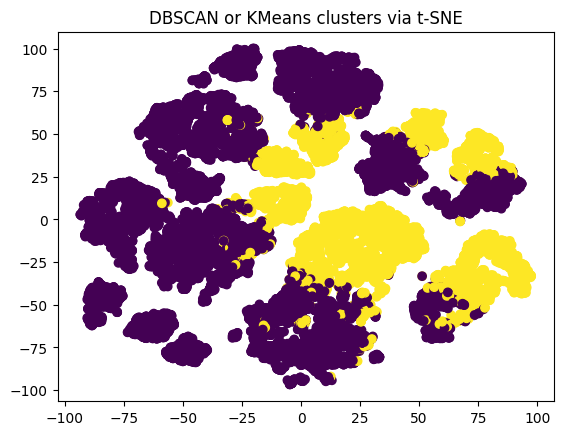

Agglomerative Silhouette Score: 0.1994


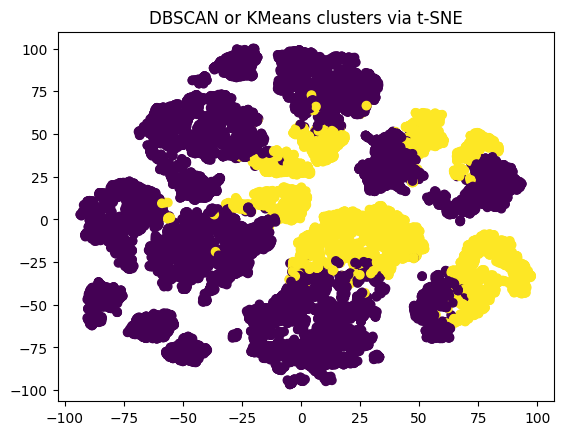

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE

for name, model in {
    "KMeans": KMeans(n_clusters=2, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=2),
}.items():
    labels = model.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"{name} Silhouette Score: {score:.4f}")

    X_tsne = TSNE(n_components=2, random_state=42).fit_transform(df_scaled)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap="viridis")
    plt.title("DBSCAN or KMeans clusters via t-SNE")
    plt.show()

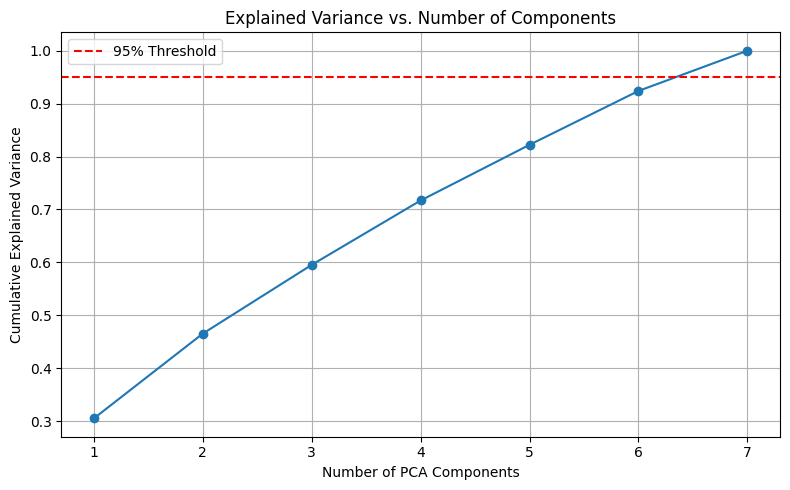

In [73]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fit PCA without limiting components
pca = PCA()
pca.fit(df_scaled)  # X_scaled = StandardScaler().fit_transform(X)

# Step 2: Get cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 3: Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% Threshold")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [74]:
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")

Number of components to retain 95% variance: 7


In [ ]:
import pandas as pd

df = pd.read_csv(
    "C:/Users/Harikrishnan/Desktop/b/Health_Monitoring_App/artifacts/data.csv"
)

In [6]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import joblib
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

best_score = -1
best_params = {}
best_labels = None

for eps in [0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.5, 1.7, 1.9,2,2.1,2.2,2.3,2.4,2.5,2.6]:
    for min_samples in [3, 4, 5, 6, 7, 9, 11 , 12 ,13 ,14 , 15, 16, 17]:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X_scaled)
        mask = labels != -1  # Exclude noise for silhouette
        if len(set(labels[mask])) > 1:
            score = silhouette_score(X_scaled[mask], labels[mask])
            if score > best_score:
                best_score = score
                best_params = {"eps": eps, "min_samples": min_samples}
                best_labels = labels

# Count clusters excluding noise label -1
num_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)

print(f"Best Silhouette Score: {best_score}")
print(f"Best Params: {best_params}")
print(f"Number of clusters (excluding noise): {num_clusters}")

Best Silhouette Score: 0.3526015479172196
Best Params: {'eps': 1.2, 'min_samples': 11}
Number of clusters (excluding noise): 2


In [7]:
df["cluster"] = best_labels  # best_labels from your clustering output

In [10]:
df.groupby("cluster").mean()  # mean values per cluster


,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2
cluster,,,,,,
-1,97.833333,81.150000,127.458333,92.900000,97.723949,96.258333
0,86.236061,76.848471,117.981886,91.925295,97.340547,97.375964
1,245.912142,80.255676,120.166831,86.538006,97.541101,97.564659


In [11]:
df.groupby("cluster").median()  # median values per cluster


,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2
cluster,,,,,,
-1,78.0,81.5,133.0,91.5,97.812184,95.0
0,82.0,76.0,118.0,90.0,97.308561,98.0
1,246.0,80.0,120.0,87.0,97.538705,98.0


In [19]:
df.groupby("cluster")["Blood Glucose Level(BGL)"].describe()  # full summary stats

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
-1,120.0,97.833333,55.316102,51.0,70.0,78.0,100.0,250.0
0,15568.0,86.236061,20.677737,50.0,68.0,82.0,103.0,129.0
1,1013.0,245.912142,2.178583,242.0,244.0,246.0,247.0,250.0


In [18]:
df.head(10)

,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,cluster
0,79,73,118,98,98.300707,99,0
1,80,73,119,102,98.300707,94,-1
2,70,76,110,81,98.300707,98,0
3,70,78,115,96,98.300707,96,0
4,100,96,144,92,97.807052,98,-1
5,100,72,133,89,98.351676,96,0
6,100,94,142,78,97.939410,96,-1
7,100,77,140,83,97.787502,95,-1
8,100,79,144,87,98.288617,97,-1
9,80,78,118,96,98.007890,97,0


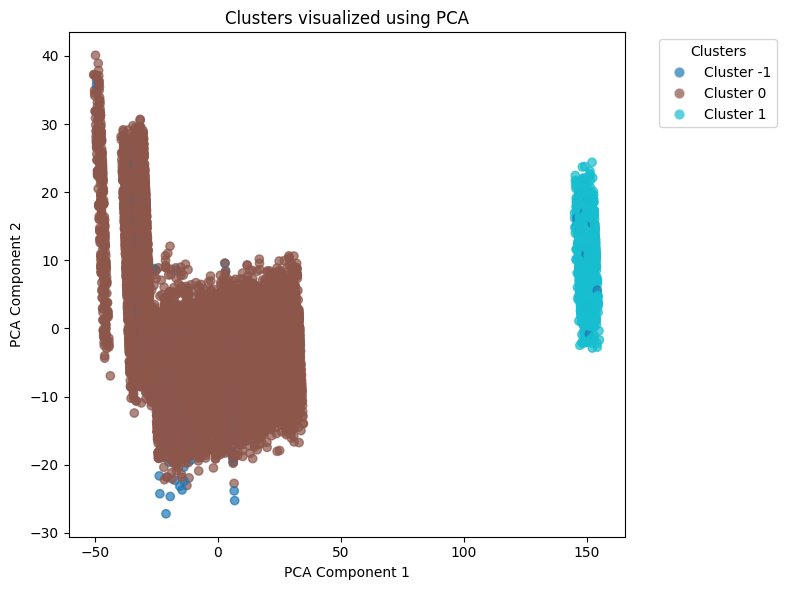

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
# Separate features (exclude cluster label)
features = df.drop(columns=["cluster"])

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
components = pca.fit_transform(features)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    components[:, 0], components[:, 1], c=df["cluster"], cmap="tab10", alpha=0.7
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters visualized using PCA")
# Create a legend
unique_clusters = np.unique(df["cluster"])
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))

handles = []
for color, cluster in zip(colors, unique_clusters):
    handles.append(
        plt.Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            label=f"Cluster {cluster}",
            markerfacecolor=color,
            markersize=8,
            alpha=0.7,
        )
    )

plt.legend(
    handles=handles, title="Clusters", bbox_to_anchor=(1.05, 1), loc="upper left"
)

plt.tight_layout()
plt.show()

In [15]:
df['cluster'].unique()

array([ 0, -1,  1])